In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Share/P3input2024_pre.txt'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = []
with open(file_path, 'r') as file:
    for line in file:
        x, y, label = line.strip().split('\t')
        label = 0 if label == '0' else 1
        data.append([float(x), float(y), label])

In [4]:
data = pd.DataFrame(data, columns=['X1', 'X2', 'Label'])
data.to_csv('P3input2024.txt', index=False, sep='\t')

In [5]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.to_csv('P3input2024_train.txt', index=False, sep='\t')
test_data.to_csv('P3input2024_test.txt', index=False, sep='\t')

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def logistic_regression(X, y, iterations, learning_rate, method='batch', batch_size=20):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []

    for it in range(iterations):
        if method == 'batch':
            gradient = (1 / m) * X.T.dot(sigmoid(X.dot(theta)) - y)
        elif method == 'mini_batch':
            indices = np.random.choice(m, batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]
            gradient = (1 / batch_size) * X_batch.T.dot(sigmoid(X_batch.dot(theta)) - y_batch)
        elif method == 'stochastic':
            index = np.random.randint(m)
            X_sample = X[index].reshape(1, -1)
            y_sample = y[index]
            gradient = X_sample.T.dot(sigmoid(X_sample.dot(theta)) - y_sample)

        theta -= learning_rate * gradient
        loss = -(1 / m) * np.sum(y * np.log(sigmoid(X.dot(theta))) + (1 - y) * np.log(1 - sigmoid(X.dot(theta))))
        losses.append(loss)

    return theta, losses

In [8]:
X_train = train_data[['X1', 'X2']].values
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
y_train = train_data['Label'].values

X_test = test_data[['X1', 'X2']].values
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
y_test = test_data['Label'].values

In [12]:
methods = ['batch', 'mini_batch', 'stochastic']
learning_rate = 0.1
iterations = 300000

results = {}
import time
start_time = time.time()

for method in methods:
    print(f"Running {method} gradient descent...")
    theta, losses = logistic_regression(X_train, y_train, iterations, learning_rate, method=method)
    results[method] = {'theta': theta, 'losses': losses}

    predictions = (sigmoid(X_test.dot(theta)) >= 0.5).astype(int)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{method} accuracy: {accuracy:.4f}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Running batch gradient descent...
batch accuracy: 0.9630
Running mini_batch gradient descent...
mini_batch accuracy: 0.9630
Running stochastic gradient descent...


<ipython-input-7-a9254e294737>:21: RuntimeWarning: divide by zero encountered in log
  loss = -(1 / m) * np.sum(y * np.log(sigmoid(X.dot(theta))) + (1 - y) * np.log(1 - sigmoid(X.dot(theta))))
<ipython-input-7-a9254e294737>:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(1 / m) * np.sum(y * np.log(sigmoid(X.dot(theta))) + (1 - y) * np.log(1 - sigmoid(X.dot(theta))))


stochastic accuracy: 0.7778
Execution time: 57.8389847278595 seconds


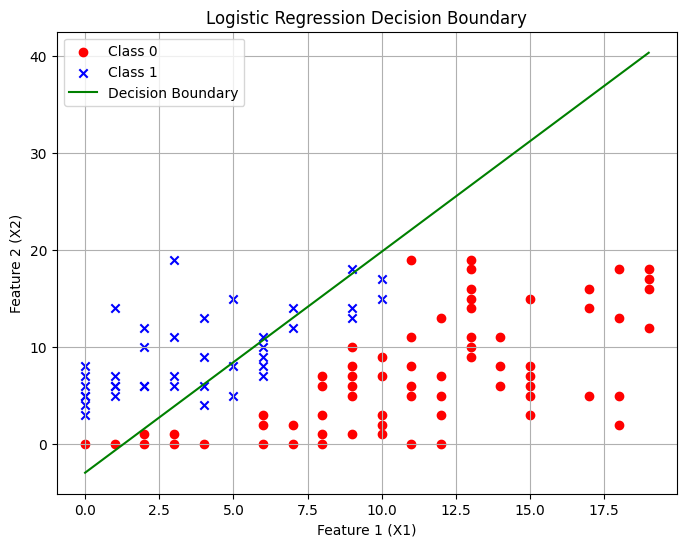

In [10]:
#Q2

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(theta, X, y):
    plt.figure(figsize=(8, 6))

    for label, marker, color in zip([0, 1], ['o', 'x'], ['red', 'blue']):
        subset = y == label
        plt.scatter(X[subset, 1], X[subset, 2], marker=marker, color=color, label=f"Class {label}")

    x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    y_values = -(theta[0] + theta[1] * x_values) / theta[2]

    plt.plot(x_values, y_values, label='Decision Boundary', color='green')
    plt.xlabel('Feature 1 (X1)')
    plt.ylabel('Feature 2 (X2)')
    plt.legend()
    plt.title('Logistic Regression Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(theta, X_train, y_train)


Running batch gradient descent with learning rate: 4e-05


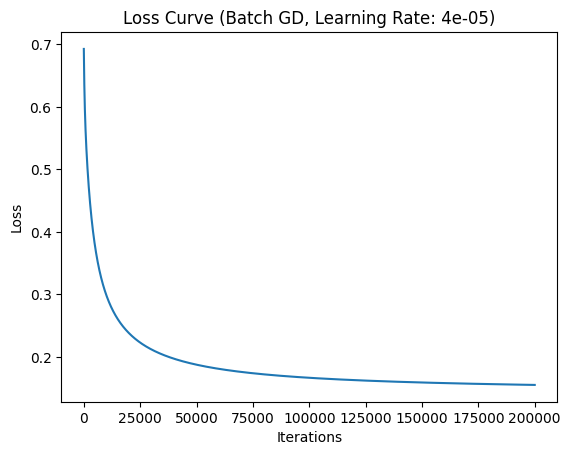

Thetas for learning rate 4e-05: [ 0.15841961 -0.92414648  0.65608309]
Running batch gradient descent with learning rate: 6e-05


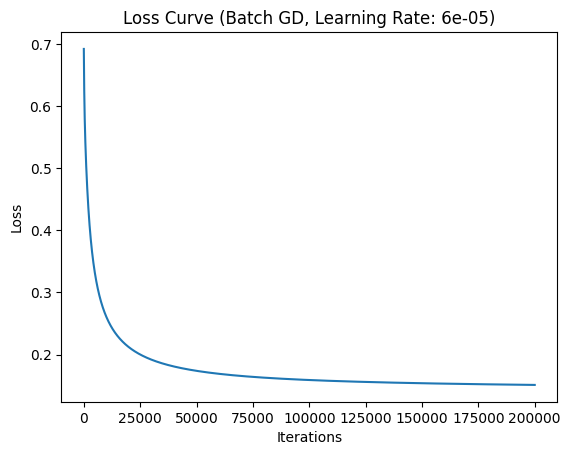

Thetas for learning rate 6e-05: [ 0.22969039 -1.01108762  0.71249342]
Running batch gradient descent with learning rate: 8e-05


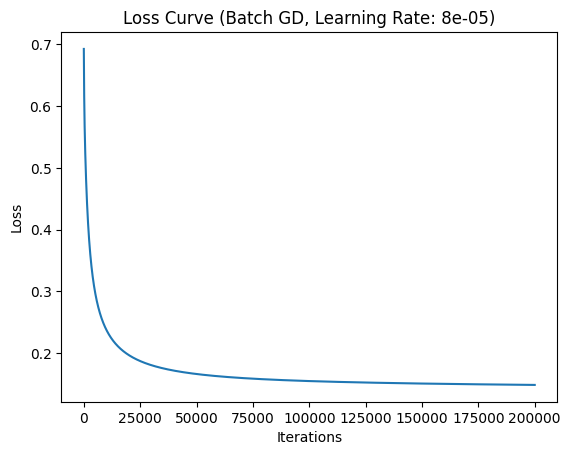

Thetas for learning rate 8e-05: [ 0.29758663 -1.06625845  0.74627017]
Running batch gradient descent with learning rate: 0.0001


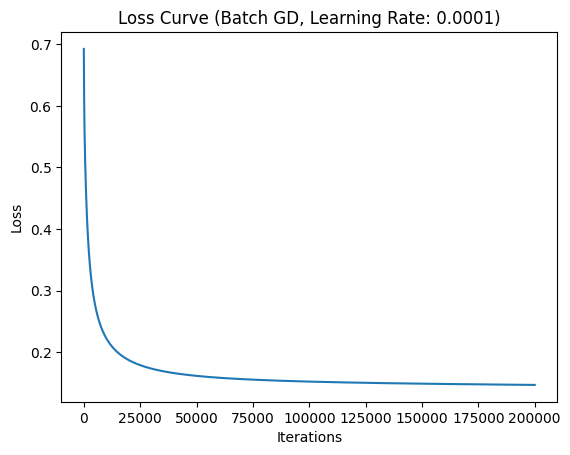

Thetas for learning rate 0.0001: [ 0.36234132 -1.10420661  0.76797854]


In [11]:
#Q3
learning_rates = [0.00004, 0.00006, 0.00008, 0.0001]
iterations = 200000

for lr in learning_rates:
    print(f"Running batch gradient descent with learning rate: {lr}")
    theta, losses = logistic_regression(X_train, y_train, iterations, lr, method='batch')
    plt.figure()
    plt.plot(losses)
    plt.title(f"Loss Curve (Batch GD, Learning Rate: {lr})")
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

    print(f"Thetas for learning rate {lr}: {theta}")
